<a href="https://colab.research.google.com/github/aparrafernandez/financialco/blob/master/Covid_19_TweetSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This is a sentiment analysis program that parses the tweets fetched from twitter on the Covid subject



In [ ]:
#Importing libraries

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import json 
plt.style.use("fivethirtyeight")

In [ ]:
#login into twitter API 
  
consumerKey = "XZTyxAvBUBhneWdz9t1mCr5T2"
consumerSecret = "0zlVnxXVzVAriZfN7s57AHiqKQEoUQRpiKkpIhAjDEVuJmToXc"
token = "82730463-WbfR4J475AoDZPU4RqLEVa7I1T6akJq76tSmjGRFV"
tokensecret = "ihWWhy7k4BJvG0d2zvw79kzERxlALzj9Fgc97efDbVGds" 

In [ ]:
#Authentication object

auth = tweepy.OAuthHandler(consumerKey,consumerSecret)

#Set access token and ats
auth.set_access_token(token,tokensecret)

#Create the API object while passing in the auth information
api = tweepy.API(auth)


In [ ]:
from tweepy import Stream
from tweepy import StreamListener
import re
import csv
import sys

class listener(StreamListener):

     

  def __init__(self,max_tweets):
    self.tweet_number=0
    self.max_tweets=max_tweets # max number of tweets
    ##self.file = open("tweets.txt","w")

  def on_data(self,data):
    
    raw_twits = json.loads(data)

    tweets= raw_twits["text"]
    tweets = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweets).split())
    tweets = re.sub(r'@\S+|https?://\S+', '', tweets)
    tweets = re.sub(r'RT[\s]+', '', tweets)
 
    with open("coviden.txt", 'a') as savefile:
     savefile.write(tweets + "\n")
    print(tweets)
    
    ##self.file.write(json.dumps(raw_twits) + "\\n")
    ##self.file.close()
    self.tweet_number+=1
   
    if self.tweet_number<self.max_tweets:
      return True
      
    else:
      return False 
  
    
      



  def on_error(self,status):
    print(status)





In [ ]:
twtstream = Stream(auth,listener(100))
twtstream.filter(track=["covid"],languages=["en"])



Guard your parents and grandparents Coco puffs will not hesitate to murder another 35k just another day at the o
COVID Update July 26 We can virtually eliminate the virus any time we decide to 1
The Arkansas Legislative Council will reconvene tomorrow to reconsider the proposal announces NWANews
BREAKING Major League Baseball to hold an emergency meeting today after 14 Miami Marlins have tested positive for COVID 1
The best laid plans of a multi billion dollar sports league with effectively unlimited resources has made it a week before
We ve unlearnt VIRUS redefined for a covid secure bubble during these difficult and uncertain time Apply through Cleari
Transparency around government decision making is another casualty of Covid 19 Wrote this column a month ago the PM has a
My latest scans show I m still cancer free after my terrifying Covid blip
How dare you blame Pakistani people for your criminal negligence Bilawal slams Centre over COVID 19
Trump knew Dems would use Covid to cheat b

In [ ]:
# String of path to file: tweets_data_path
tweets_data_path="coviden.txt"


# Initialize empty list to store tweets: tweets_data
tweets_data=[]


# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data

for line in tweets_file:
  tweets_data.append(line)
 

data = pd.DataFrame(tweets_data)

print(data.head())

                                                   0
0  Guard your parents and grandparents Coco puffs...
1  COVID Update July 26 We can virtually eliminat...
2  The Arkansas Legislative Council will reconven...
3  BREAKING Major League Baseball to hold an emer...
4  The best laid plans of a multi billion dollar ...


In [ ]:
# create a function to get the subjectiviy

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# create a function tu get the polarity 

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create two new columns 
data ["tweets"] = data
data["Subjectivity"] = data["tweets"].apply(getSubjectivity)
data["Polarity"] = data["tweets"].apply(getPolarity)

print(data[["tweets","Polarity","Subjectivity"]].head())


                                              tweets  Polarity  Subjectivity
0  Guard your parents and grandparents Coco puffs...  0.000000      0.000000
1  COVID Update July 26 We can virtually eliminat...  0.000000      0.000000
2  The Arkansas Legislative Council will reconven...  0.000000      0.000000
3  BREAKING Major League Baseball to hold an emer...  0.144886      0.522727
4  The best laid plans of a multi billion dollar ...  0.800000      0.550000


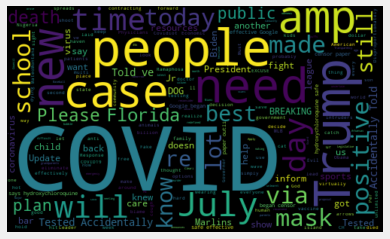

In [ ]:
# Plot the Word Cloud 

allWords = "".join([twts for twts in data["tweets"]])

wordCloud = WordCloud(width = 500, height=300, random_state =21,max_font_size =119).generate(allWords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Create function to compute negative, neutral and positive analysis

def getAnalysis(score):
  if score < 0:
    return "Negative"
  elif score == 0:
    return "Neutral"
  else:
    return "Positive"

data["Analysis"] = data["Polarity"].apply(getAnalysis)

data.head()

,0,tweets,Subjectivity,Polarity,Analysis
0,Guard your parents and grandparents Coco puffs...,Guard your parents and grandparents Coco puffs...,0.000000,0.000000,Neutral
1,COVID Update July 26 We can virtually eliminat...,COVID Update July 26 We can virtually eliminat...,0.000000,0.000000,Neutral
2,The Arkansas Legislative Council will reconven...,The Arkansas Legislative Council will reconven...,0.000000,0.000000,Neutral
3,BREAKING Major League Baseball to hold an emer...,BREAKING Major League Baseball to hold an emer...,0.522727,0.144886,Positive
4,The best laid plans of a multi billion dollar ...,The best laid plans of a multi billion dollar ...,0.550000,0.800000,Positive


In [ ]:
# Print all the positive tweets

j = 1 
sortedData = data.sort_values(by=["Polarity"])
for i in range (0, sortedData.shape[0]):
  if (sortedData["Analysis"][i] == "Positive"):
   print(str(j) + ")" + sortedData["tweets"][i])
   print()
   j = j+1



1)BREAKING Major League Baseball to hold an emergency meeting today after 14 Miami Marlins have tested positive for COVID 1


2)The best laid plans of a multi billion dollar sports league with effectively unlimited resources has made it a week before


3)The and President are leading the fight against COVID 19 Thanks to his leadership and the


4)Some good news


5)says that not only is hydroxychloroquine safe and effective but Google began to censor his paper outli


6)WOW Physicians have gathered in Washington DC to let the American people know there ARE effective treatment options av


7)A new poll of Texas shows that Texans overwhelmingly approve of mask requirements believe that the closing of bars has s


8)says that not only is hydroxychloroquine safe and effective but Google began to censor his paper outli


9)Fauci knew CDC knew but they with MSM s help rejected it because POTUS Trump mentioned it Who s responsible for deaths a


10)We can pass COVID on to animals but not catc

0               34
tweets          34
Subjectivity    34
Polarity        34
Analysis        34
dtype: int64

In [ ]:
# Print all the negative tweets

j = 1 
sortedData = data.sort_values(by=["Polarity"])
for i in range (0, sortedData.shape[0]):
  if (sortedData["Analysis"][i] == "Negative"):
   print(str(j) + ")" + sortedData["tweets"][i])
   print()
   j = j+1

1)We ve unlearnt VIRUS redefined for a covid secure bubble during these difficult and uncertain time Apply through Cleari


2)My latest scans show I m still cancer free after my terrifying Covid blip


3)How dare you blame Pakistani people for your criminal negligence Bilawal slams Centre over COVID 19


4)vivinate Absolutely not He s Trump Jr Jr Jr and he will never be re elected He s done A kicked back y


5)I was in Tesco Gorey today and seen this lad thought it was an in store promotion thing No some mad fella out shopping C


6)9 COVID 19 made me realize I need to take every opportunity seriously So I m finna fight my cousin next family holiday


7)Positive COVID 19 cases in our state are trending in the wrong direction Governor Parson continues to ignore the dead


8)Did they tRump Pence amp tRump need to keep their diseased Evil amp Deprave Selves out of Florida for We d


9)I missed sports but jeez the marlins got covid man that sucks


10)Failure More Of Your Fake News You Bri

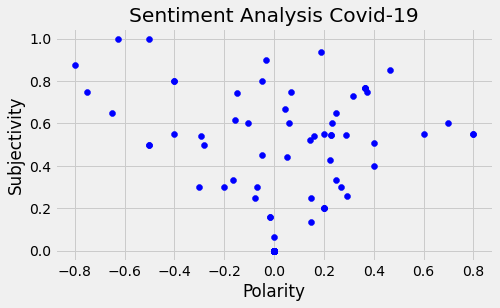

In [ ]:
# Plot the polarity and subjectivity
fig,ax = plt.subplots(figsize=(7,4))


for i in range(0,data.shape[0]):
 ax.scatter(data["Polarity"][i],data["Subjectivity"][i],color = "Blue")

ax.set_title("Sentiment Analysis Covid-19")
ax.set_xlabel("Polarity")
ax.set_ylabel("Subjectivity")
plt.show()

In [ ]:
# Get the % of positive tweets

ptweets = data[data["Analysis"] == "Positive"]
ptweets = ptweets["tweets"]

round((ptweets.shape[0]/data.shape[0])*100,1)


34.0

In [ ]:
# Get the % of negative tweets

ptweets = data[data["Analysis"] == "Negative"]
ptweets = ptweets["tweets"]

round((ptweets.shape[0]/data.shape[0])*100,1)

25.0

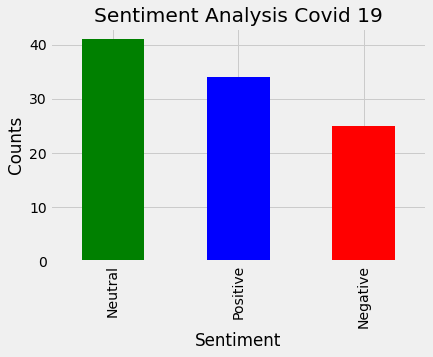

In [ ]:
# Show the value counts

data["Analysis"].value_counts()

#plot and visualize the counts

plt.title("Sentiment Analysis Covid 19")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
data["Analysis"].value_counts().plot(kind="bar",color=["g","b","r"])
plt.show()